In [55]:
import mne
from mne import io
import matplotlib.pyplot as plt

#data_path = mne.datasets.sample.data_path()
raw_name = "E:/学习资料/papers/数据/人民医院 患者脑电数据/脑电切片/SE切片/平均参考/第一批次/EAV-王纯钢-20220321.fif"

raw = io.read_raw_fif(raw_name)

raw.plot()

C:\Users\ANSHANJIAN\AppData\Local\Temp\ipykernel_14684\517803321.py:8: RuntimeWarning: This filename (E:/学习资料/papers/数据/人民医院 患者脑电数据/脑电切片/SE切片/平均参考/第一批次/EAV-王纯钢-20220321.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = io.read_raw_fif(raw_name)


In [9]:
raw.info

<Info | 9 non-empty values
 bads: []
 ch_names: EEG Fp1-AV, EEG Fp2-AV, EEG F3-AV, EEG F4-AV, EEG C3-AV, EEG ...
 chs: 17 EEG
 custom_ref_applied: False
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 512.0 Hz
 meas_date: 2022-03-21 14:58:33 UTC
 meas_id: 4 items (dict)
 nchan: 17
 projs: []
 sfreq: 1024.0 Hz
>

{}
[]


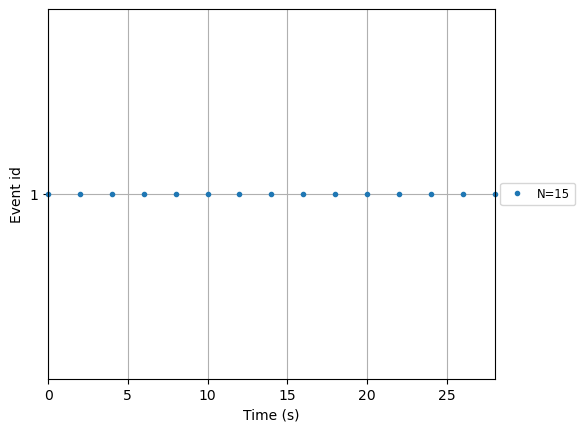

In [56]:
events_from_annot, event_dict = mne.events_from_annotations(raw)
print(event_dict)
print(events_from_annot[:5])
scalings = {'eeg': 'auto'}
raw.plot(scalings=scalings)
#创建等距事件，默认id为1
events = mne.make_fixed_length_events(raw, duration=2.0)
#绘制事件
fig = mne.viz.plot_events(events, sfreq=raw.info['sfreq'],first_samp=raw.first_samp)
fig.subplots_adjust(right=0.7)  # make room for legend
#将事件和原始数据一起绘制

In [57]:
epochs = mne.Epochs(raw,new_events)
epochs.plot()
#原数据
print(raw.get_data().shape)
#分段后
for epoch in epochs[:3]:
    print(len(epoch))
    print(len(epoch[0]))
    print(epoch)

(17, 30720)
17
718
[[ 1.20175908e-05  1.14072298e-05  1.11020498e-05 ...  1.14072298e-05
   1.07968688e-05  1.01865078e-05]
 [ 2.39462942e-05  2.39462942e-05  2.33359333e-05 ...  2.08944897e-05
   2.08944897e-05  2.08944897e-05]
 [-3.32439272e-06 -3.32439272e-06 -3.32439272e-06 ...  2.07848621e-05
   1.86485991e-05  1.68175171e-05]
 ...
 [-1.12116774e-05 -9.99095584e-06 -8.77023387e-06 ... -6.63397088e-06
  -6.32879084e-06 -6.02360990e-06]
 [-5.60435721e-06 -5.60435721e-06 -5.60435721e-06 ... -8.65616214e-06
  -7.74062020e-06 -7.13025922e-06]
 [-4.33622880e-06 -4.33622880e-06 -4.64140930e-06 ...  2.98810165e-06
   2.68292116e-06  2.68292116e-06]]
17
718
[[ 5.65769009e-06  5.65769009e-06  5.65769009e-06 ... -2.88736233e-06
  -2.27700180e-06 -1.66664082e-06]
 [ 5.08584756e-06  5.69620764e-06  6.00138859e-06 ... -1.32294232e-06
  -1.01776228e-06 -7.12581337e-07]
 [ 1.04324305e-05  9.82206947e-06  9.51688897e-06 ...  1.13479717e-05
   1.19583325e-05  1.22635130e-05]
 ...
 [ 5.03103239e-06 

In [58]:
import numpy as np
channel_types = {'EEG Fp1-AV': 'eeg', 'EEG Fp2-AV': 'eeg', 'EEG F3-AV': 'eeg','EEG F4-AV': 'eeg','EEG C3-AV': 'eeg','EEG C4-AV': 'eeg',
                'EEG P3-AV': 'eeg','EEG P4-AV': 'eeg','EEG O1-AV': 'eeg','EEG O2-AV': 'eeg','EEG F7-AV': 'eeg','EEG F8-AV': 'eeg',
                 'EEG T3-AV': 'eeg','EEG T4-AV': 'eeg','EEG T5-AV': 'eeg','EEG T6-AV': 'eeg','EEG Cz-AV': 'eeg'}
epochs.set_channel_types(channel_types)
nave = len(epochs.get_data())
epochs.get_data().shape
evoked_data = np.mean(epochs.get_data(),axis=0)
evokeds = mne.EvokedArray(evoked_data, info=raw.info, tmin=-0.2,nave=nave)
# 假设您的EEG通道的通道名是如下所示，确保通道名正确
eeg_channel_names = ['EEG Fp1-AV', 'EEG Fp2-AV', 'EEG F3-AV', 'EEG F4-AV', 'EEG C3-AV', 'EEG C4-AV', 'EEG P3-AV', 'EEG P4-AV', 'EEG O1-AV', 'EEG O2-AV', 'EEG F7-AV', 'EEG F8-AV', 'EEG T3-AV', 'EEG T4-AV', 'EEG T5-AV', 'EEG T6-AV', 'EEG Cz-AV']

# 获取通道类型的字典
channel_types = {ch_name: 'eeg' for ch_name in eeg_channel_names}

# 更新通道类型信息
evokeds.set_channel_types(channel_types)

#绘制图像
evokeds.animate_topomap()
#由于通道数与标准的10_20系统不同，采用自主设置脑电通道的方式后，函数未能读取脑电数据，等距划分脑电图并绘制脑电地形图未能实现
#需要考虑按照事件划分绘制脑电地形图

RuntimeError: No digitization points found.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os

from mne import io
from mne import read_evokeds

raw_name = "E:/学习资料/papers/数据/人民医院 患者脑电数据/脑电切片/SE切片/平均参考/第一批次/EAV-王纯钢-20220321.fif"

raw = io.read_raw_fif(raw_name)

# 获取raw文件的文件名
raw_name = "E:/学习资料/papers/数据/人民医院 患者脑电数据/脑电切片/SE切片/平均参考/第一批次/EAV-王纯钢-20220321.fif"

# 从raw文件名中提取条件名称
condition = "Left Auditory"  # 从raw文件名中提取或手动设置条件名称

# 构建与raw文件名对应的evoked文件名
raw_filename_without_extension = os.path.splitext(os.path.basename(raw_name))[0]
evoked_filename = f"{raw_filename_without_extension}-ave.fif"

# 使用evoked文件名读取evoked数据
evoked = read_evokeds(evoked_filename, condition=condition, baseline=(None, 0))


Opening raw data file E:/学习资料/papers/数据/人民医院 患者脑电数据/脑电切片/SE切片/平均参考/第一批次/EAV-王纯钢-20220321.fif...


C:\Users\ANSHANJIAN\AppData\Local\Temp\ipykernel_23112\308725310.py:10: RuntimeWarning: This filename (E:/学习资料/papers/数据/人民医院 患者脑电数据/脑电切片/SE切片/平均参考/第一批次/EAV-王纯钢-20220321.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = io.read_raw_fif(raw_name)


FileNotFoundError: fname does not exist: E:\学习资料\papers\数据\人民医院 患者脑电数据\脑电切片\SE切片\平均参考\第一批次\EAV-王纯钢-20220321.fif